In [5]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data = pd.read_csv('/content/globa_superstore.csv', encoding='unicode_escape')

data.head()

,Unnamed: 0,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Discount,Profit,Shipping Cost,Order Priority,order year,order_month,ship year,ship_month,unit_price,Regular_price
0,0,32298,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,0.0,762.1845,933.57,Critical,2012,7,2012,7,329.950,329.95
1,1,26341,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,0.1,-288.7650,923.63,Critical,2013,2,2013,2,412.155,457.95
2,2,25330,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,0.1,919.9710,915.49,Medium,2013,10,2013,10,575.019,638.91
3,3,13524,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,0.1,-96.5400,910.16,Medium,2013,1,2013,1,578.502,642.78
4,4,47221,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,0.0,311.5200,903.04,Critical,2013,11,2013,11,354.120,354.12


In [7]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
data_arima = data.copy(deep=True)

In [9]:
data_arima['Segment']
#data_arima['Sub-Category']

0           Consumer
1          Corporate
2           Consumer
3        Home Office
4           Consumer
            ...     
51285      Corporate
51286       Consumer
51287    Home Office
51288    Home Office
51289       Consumer
Name: Segment, Length: 51290, dtype: object

In [10]:
#data_acc = data_arima.loc[data_arima['Sub-Category'] == 'Tables']
data_acc = data_arima.loc[data_arima['Segment'] == 'Corporate']

По продажам

In [8]:
data_sales_acc = data_acc[['Order Date', 'Sales']].copy(deep=True)

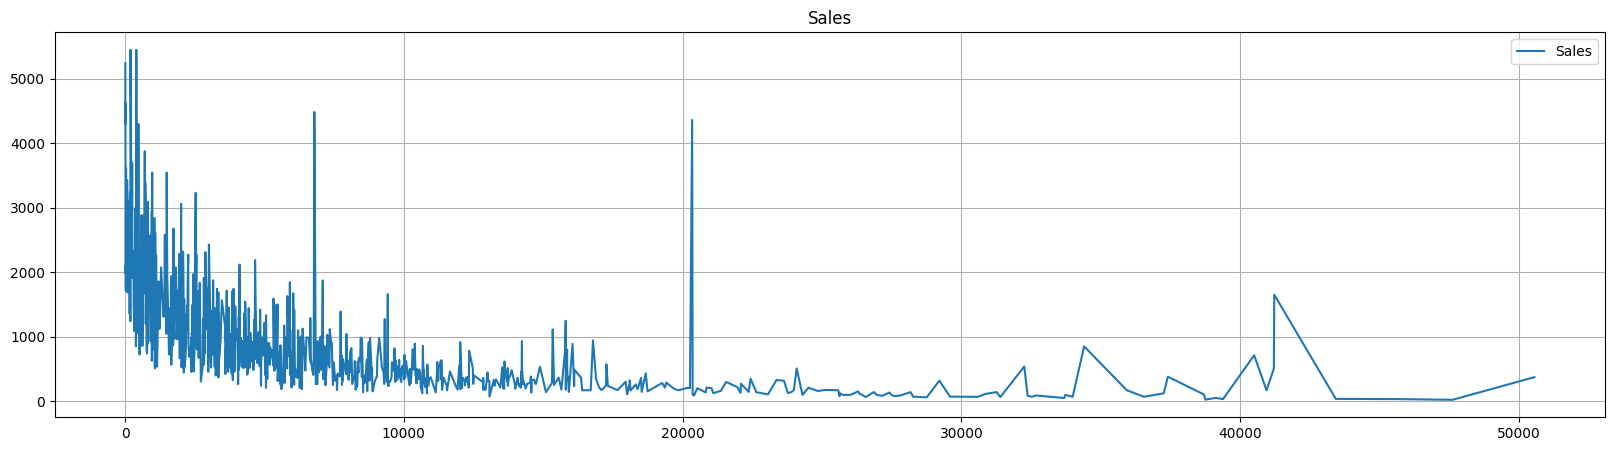

In [12]:
data_sales_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Sales')
plt.show(block=False)

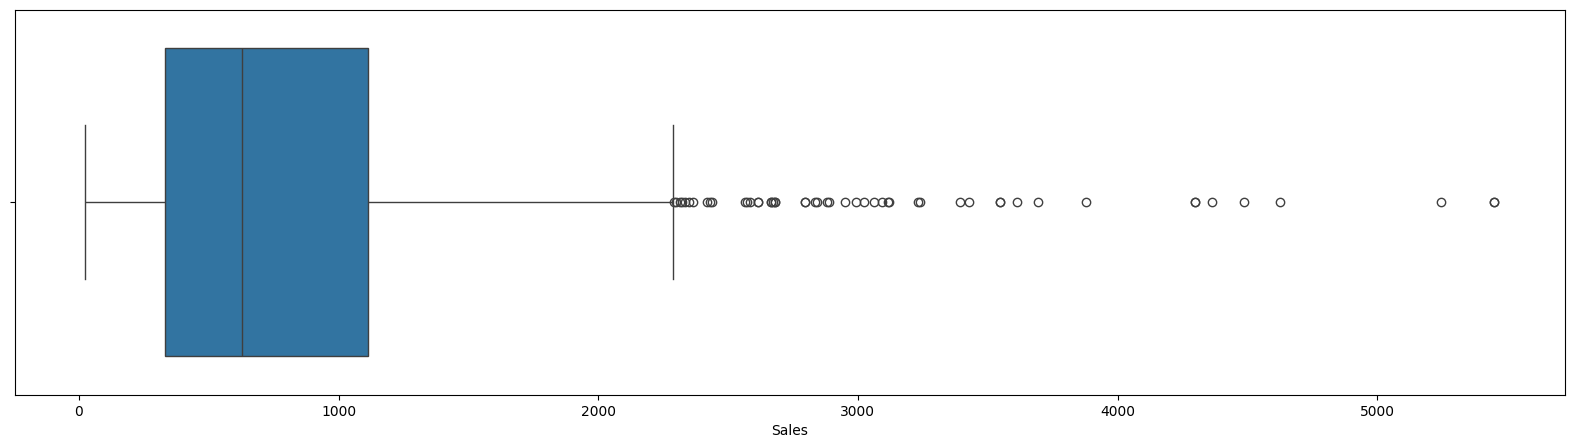

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_sales_acc['Sales'],whis=1.5)

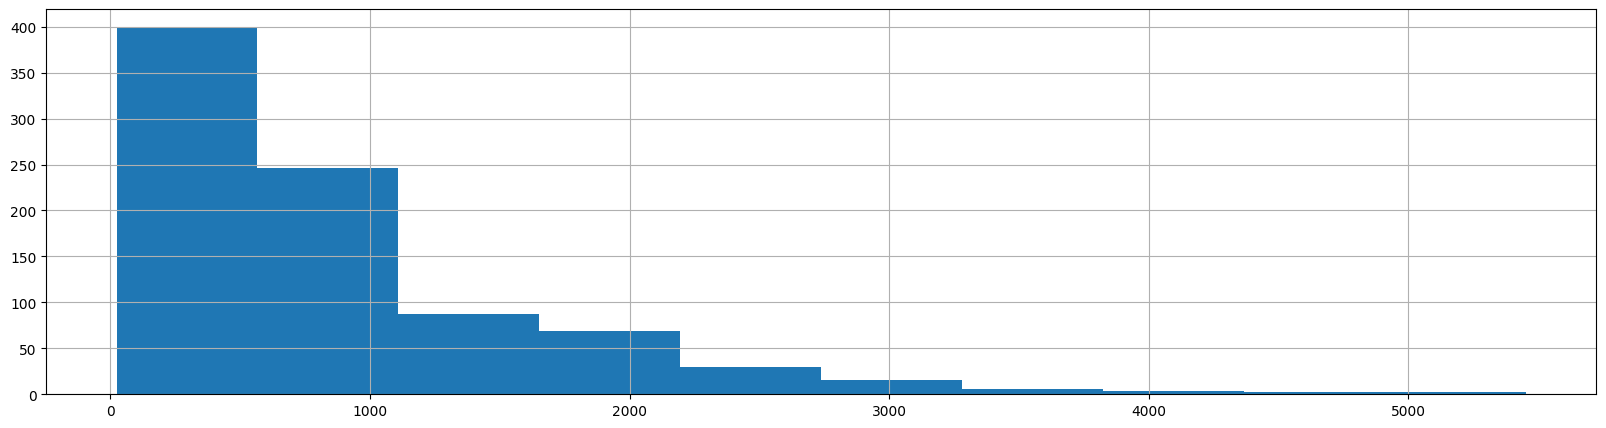

In [14]:
fig = data_sales_acc.Sales.hist(figsize = (20,5))

In [9]:
add_data_acc = data_sales_acc.groupby(['Order Date'])

In [10]:
add_data_acc = add_data_acc.mean().round(2).reset_index()

In [18]:
add_data_acc['Order Date'].max()

'2014-12-31'

In [19]:
add_data_acc['Order Date'].min()

'2011-01-03'

In [11]:
dates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
dates = pd.DataFrame(dates)
dates = dates.rename(columns = {0:'Order Date'})
add_data_acc["Order Date"]=pd.to_datetime(add_data_acc["Order Date"])
dates= pd.merge(dates, add_data_acc, on = 'Order Date', how="left")
dates = dates.fillna(0)
dates.set_index('Order Date', inplace=True)
datesm = dates.resample('M').mean()

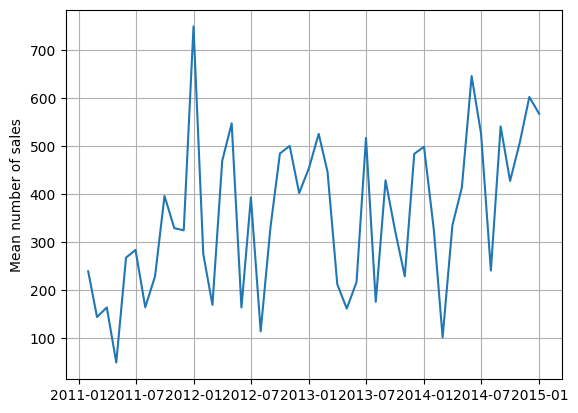

In [21]:
import matplotlib.pylab as plt
plt.plot(datesm)
plt.ylabel('Mean number of sales')
plt.grid()
plt.show()

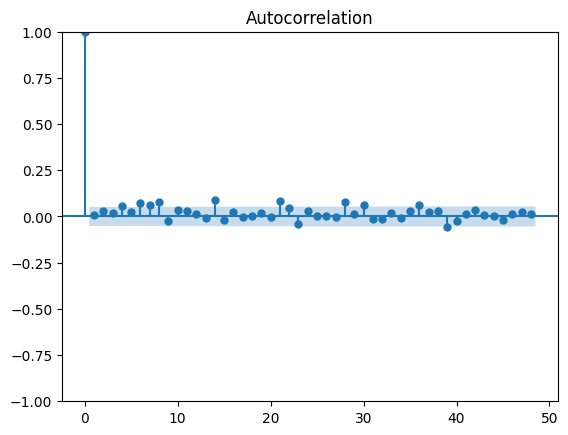

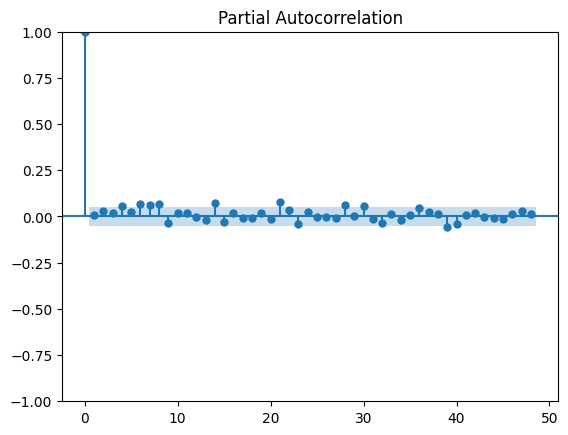

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(dates, lags =48)
plot_pacf(dates, lags =48)
plt.show()

In [27]:
import itertools as it
import statsmodels.api as sm

Аггрегировано по месяцам

SARIMA

In [ ]:
datesm

In [22]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.0 MB/s eta 0:00:00


In [27]:
from pmdarima.arima import auto_arima
model = auto_arima(datesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=634.180, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=628.955, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=632.239, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=622.302, Time=1.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=621.342, Time=1.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=621.456, Time=0.79 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.62 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=620.026, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=620.702, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=620.449, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=618.830, Time=0.33 sec
 A

In [46]:
from statsmodels.tsa.arima.model import ARIMA

In [44]:
train_len = 37
train = datesm[0:train_len]
test = datesm[train_len:]

374.8
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.2964      0.333     -3.891      0.000      -1.949      -0.643
ma.S.L3       -1.0002    241.409     -0.004      0.997    -474.153     472.153
sigma2      1.494e+04   3.61e+06      0.004      0.997   -7.07e+06     7.1e+06


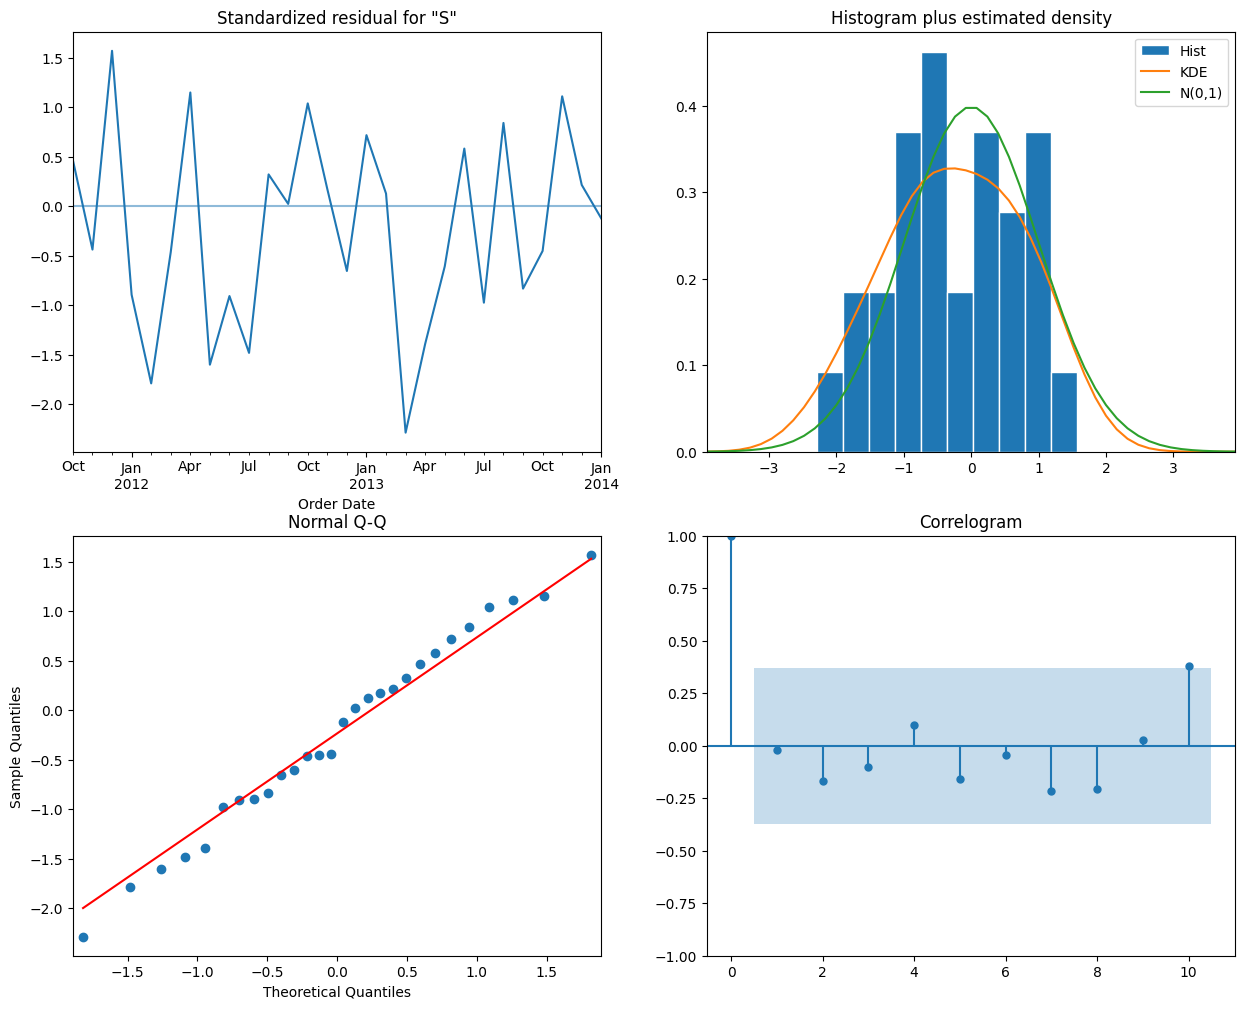

In [66]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

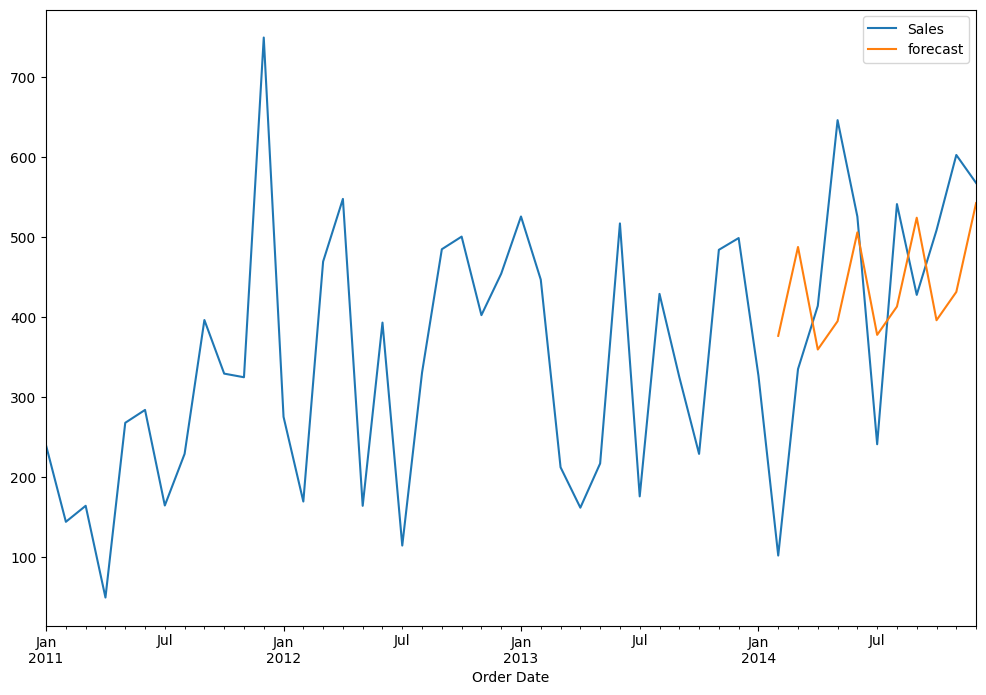

In [67]:
datesm['forecast']=results.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast']].plot(figsize=(12,8))

In [28]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [45]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
 return sqrt(mean_squared_error(actual, predicted))

In [46]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [68]:
measure_rmse(datesm.Sales[37:], datesm.forecast[37:])

151.48445228308321

In [69]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast[37:])

48.255054135135516

In [70]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 0, 1),seasonal_order=(1,0,1,12))
results=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Order Date'>

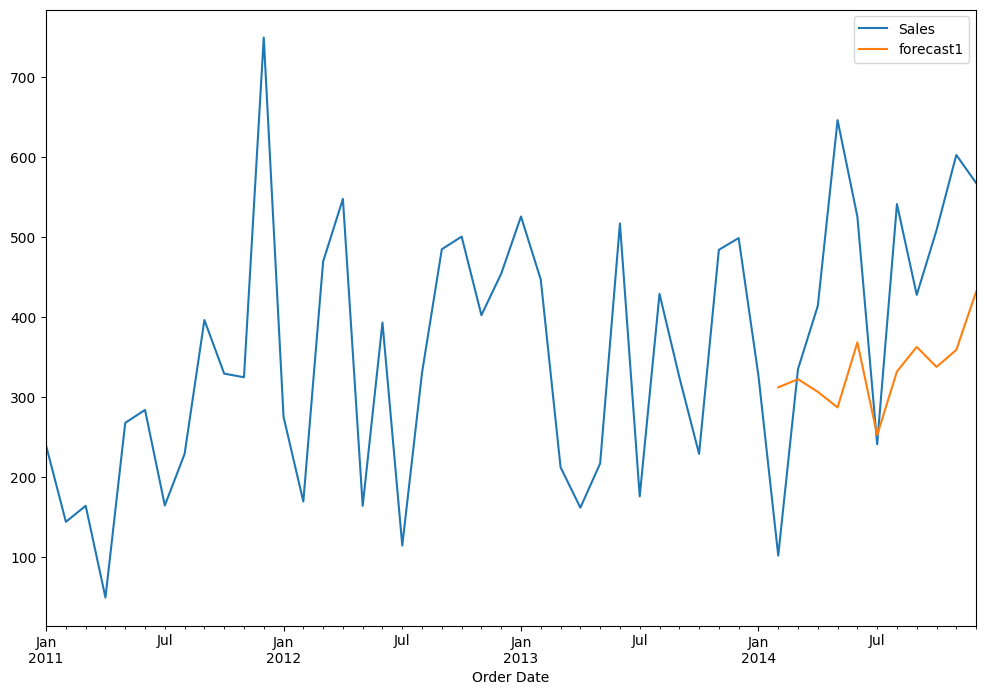

In [71]:
datesm['forecast1']=results.predict(start=37,end=47,dynamic=True)
datesm[['Sales','forecast1']].plot(figsize=(12,8))

In [73]:
measure_rmse(datesm.Sales[37:], datesm.forecast1[37:])

182.1696060629484

In [74]:
mean_absolute_percentage_error(datesm.Sales[37:], datesm.forecast1[37:])

43.607765603579175

Prophet

In [53]:
from prophet import Prophet

In [75]:
datesm.drop('forecast', axis = 1, inplace = True)
datesm.drop('forecast1', axis = 1, inplace = True)

In [77]:
datesm = datesm.reset_index()
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet

In [82]:
datesm.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = datesm[0:train_len]
test = datesm[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))  # Здесь 12 - количество шагов вперед

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfppub9fd/iz_7ejo1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfppub9fd/6ol1jlm1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39738', 'data', 'file=/tmp/tmpfppub9fd/iz_7ejo1.json', 'init=/tmp/tmpfppub9fd/6ol1jlm1.json', 'output', 'file=/tmp/tmpfppub9fd/prophet_model9kw9_3o7/prophet_model-20240420180931.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:09:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:09:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds        yhat  yhat_lower  yhat_upper
36 2014-01-31  408.574922  307.253822  513.288829
37 2014-02-28  331.670918  220.240573  430.917162
38 2014-03-31  323.696667  220.695358  432.038449
39 2014-04-30  254.528215  154.243942  360.887442
40 2014-05-31  336.266193  231.855127  442.179317
41 2014-06-30  457.440806  352.147942  561.422290
42 2014-07-31  241.204424  127.921699  345.702075
43 2014-08-31  372.486188  274.927953  475.560938
44 2014-09-30  453.061710  350.697829  563.739838
45 2014-10-31  387.383031  276.099925  486.990371
46 2014-11-30  445.234119  338.685763  546.779418
47 2014-12-31  708.272248  604.912758  816.972343


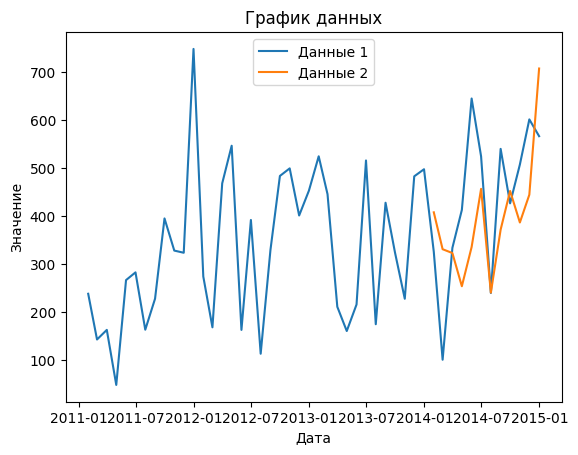

In [83]:

# Создание графика
plt.plot(datesm['ds'], datesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(12), forecast['yhat'].tail(12), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()


In [84]:
mean_absolute_percentage_error(datesm.y[37:], forecast.yhat[37:])

40.1795352793423

In [85]:
measure_rmse(datesm.y[37:], forecast.yhat[37:])

155.78386737294417

LSTM

In [59]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [88]:
datesm.rename(columns={'ds': 'Order Date', 'y': 'Sales'}, inplace=True)
datesm.set_index('Order Date', inplace=True)

In [89]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dates.values.reshape(-1, 1))

In [90]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [72]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)



In [92]:
seq_length = 12  # Длина последовательности (количество временных шагов)
train_x, train_y = create_sequences(train_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)

In [93]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(train_x, train_y, epochs=30, batch_size=16, verbose=1)


9/9 [==============================] - 1s 6ms/step
Mean Squared Error: 492274.32312773465


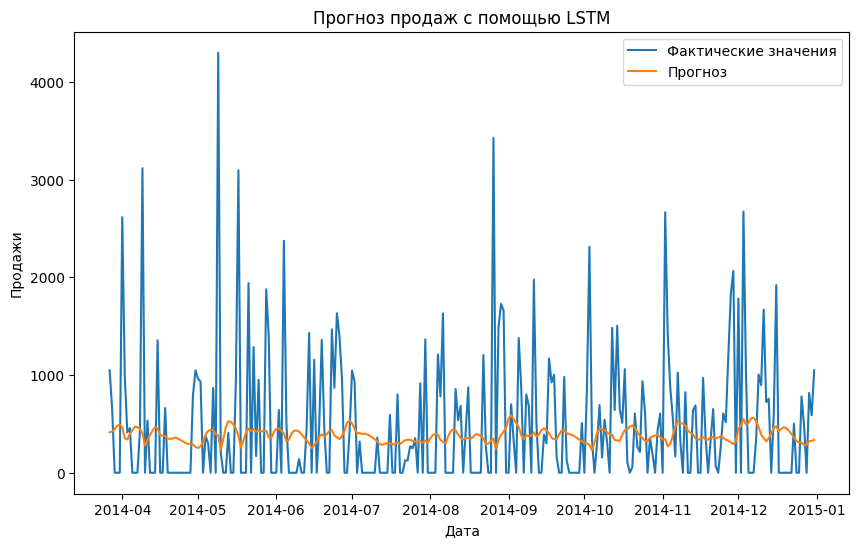

In [95]:
# Прогнозирование на тестовом наборе данных
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # Инвертирование масштабированных прогнозов
actual_values = scaler.inverse_transform(test_y.reshape(-1, 1))  # Инвертирование масштабированных фактических значений

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((predictions - actual_values) ** 2)
print('Mean Squared Error:', mse)

# Построение графика с прогнозами и фактическими значениями
plt.figure(figsize=(10, 6))
plt.plot(dates.index[len(train_data) + seq_length:], actual_values, label='Фактические значения')
plt.plot(dates.index[len(train_data) + seq_length:], predictions, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью LSTM')
plt.legend()
plt.show()

In [96]:
mean_absolute_percentage_error(predictions, actual_values)

133.50949351905925

In [98]:
measure_rmse(actual_values, predictions)

701.6226358433247

Gradien boosting

In [75]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [105]:
datesm.set_index('Order Date', inplace=True)

In [106]:
datesm['Год'] = datesm.index.year
datesm['Месяц'] = datesm.index.month
datesm['День'] = datesm.index.day
datesm['День_недели'] = datesm.index.weekday


In [ ]:
sales_data = datesm['Sales']
sales_data

In [111]:
train_data = datesm.loc[datesm.index < '2014-02-01']
test_data = datesm.loc[datesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [112]:
model = XGBRegressor()
model.fit(train_data.drop('Sales', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

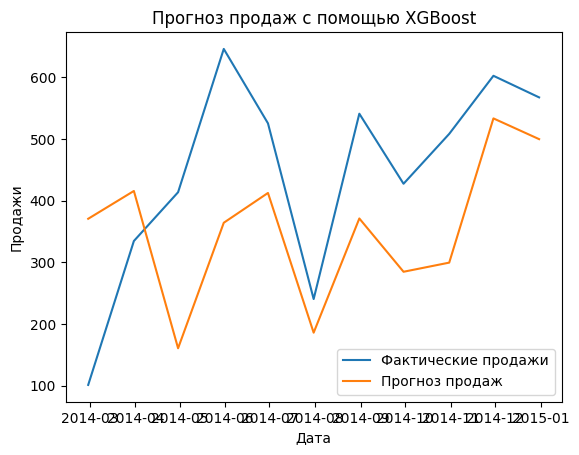

In [113]:
predictions = model.predict(test_data.drop('Sales', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические продажи')
plt.plot(test_data.index, predictions, label='Прогноз продаж')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.title('Прогноз продаж с помощью XGBoost')
plt.legend()
plt.show()


In [114]:
mean_absolute_percentage_error(test_target, predictions)

51.63805480620475

In [115]:
measure_rmse(test_target, predictions)

175.81575515642132

In [117]:
dates.drop(	['Год',	'Месяц',	'День',	'День_недели'], axis = 1, inplace = True)

In [ ]:
dates

Аггрегировано только по дням


In [118]:
model = auto_arima(dates, seasonal=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23985.324, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23543.874, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23983.325, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=23375.446, Time=0.21 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=23261.313, Time=0.25 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=23209.293, Time=0.71 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=23150.940, Time=0.68 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=9.99 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=5.94 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=23148.948, Time=0.21 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=23207.298, Time=0.17 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=22983.047, Time=2.49 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=2

In [120]:
train_len = 1160
train = dates[0:train_len]
test = dates[train_len:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


16856.75
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5578      0.634     -0.880      0.379      -1.800       0.684
ma.L1         -0.4421      0.649     -0.681      0.496      -1.714       0.829
ma.L2         -0.5320      0.639     -0.833      0.405      -1.784       0.720
ar.S.L30      -0.5263      0.244     -2.157      0.031      -1.004      -0.048
ma.S.L30      -0.4127      0.238     -1.732      0.083      -0.880       0.054
ma.S.L60      -0.5884      0.242     -2.428      0.015      -1.063      -0.113
sigma2      3.968e+05   4.15e-07   9.57e+11      0.000    3.97e+05    3.97e+05


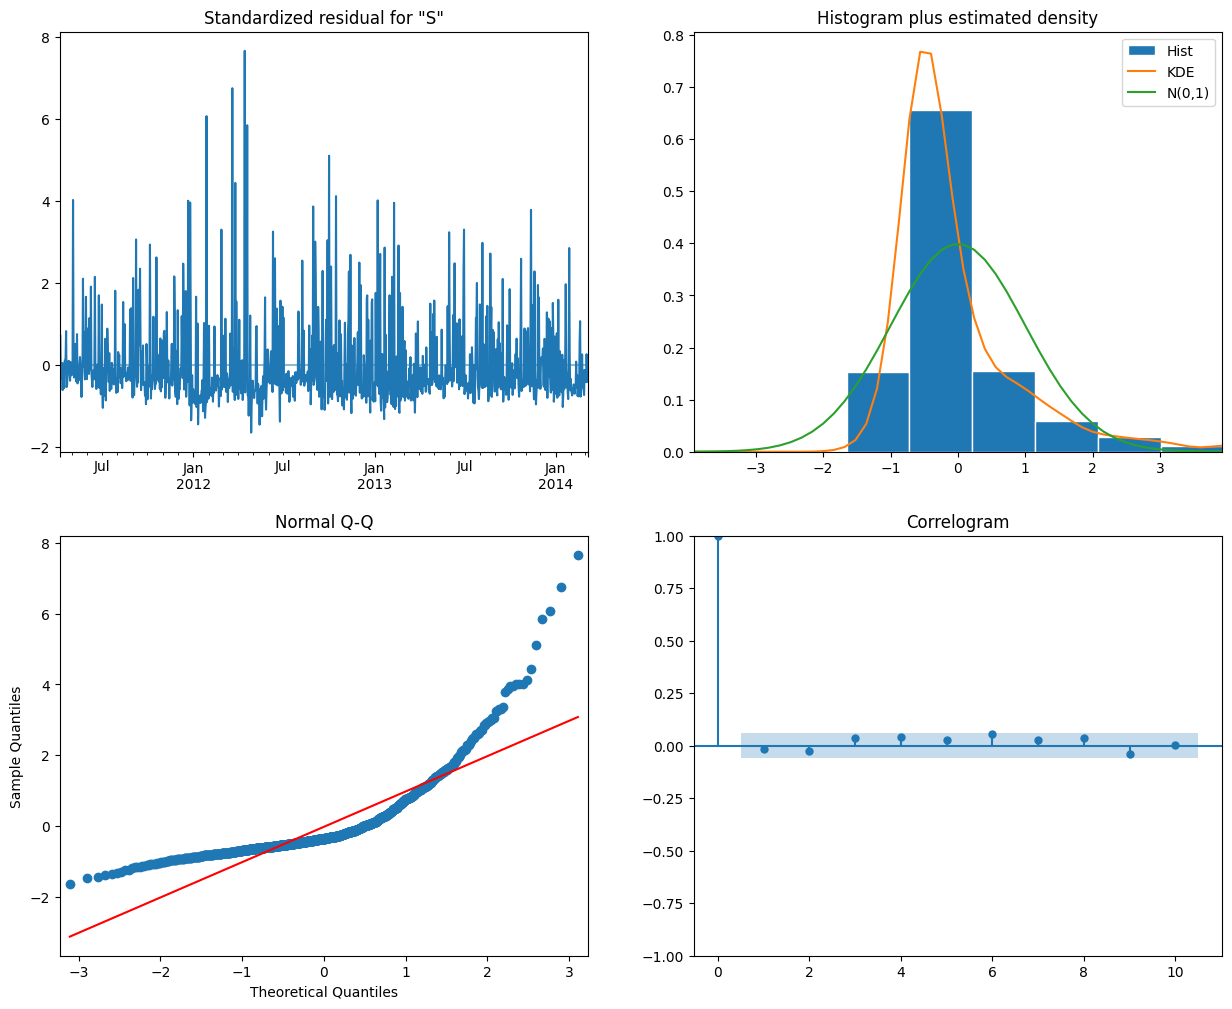

In [121]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 2),
                                seasonal_order=(1, 1, 2, 30),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

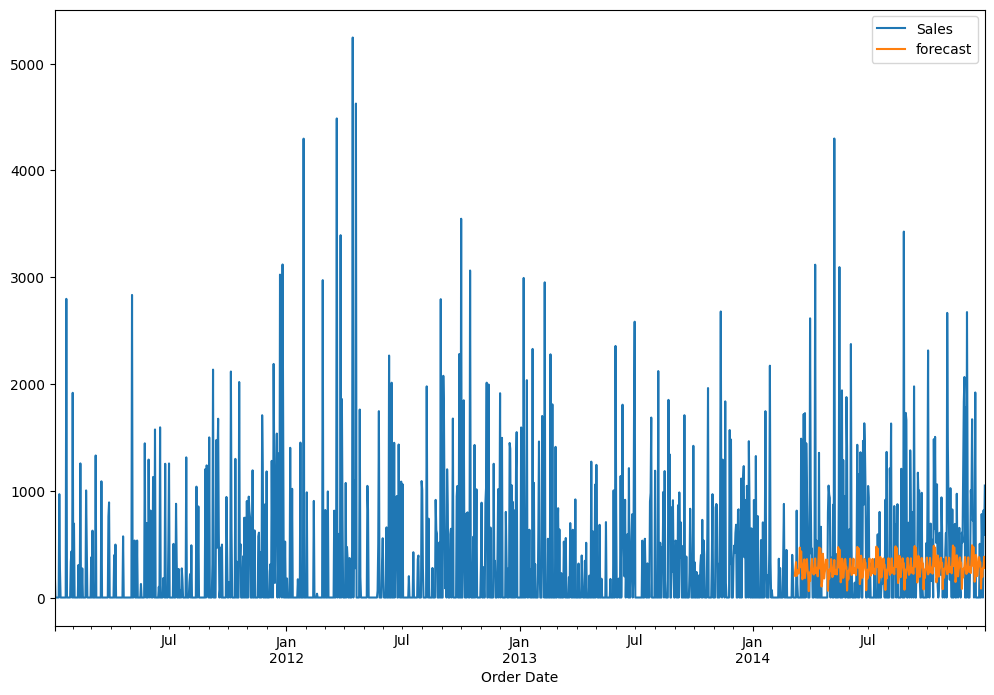

In [124]:
dates['forecast']=results.predict(start=1160,end=1459,dynamic=True)
dates[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 2),seasonal_order=(1,1,2,360))
results=model.fit()

Prophet

In [ ]:
dates.drop('forecast', aixs = 1, inplace = True)

In [19]:
dates = dates.reset_index()

In [25]:
dates.rename(columns={'Order Date': 'ds', 'Sales': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 1160
train = dates[0:train_len]
test = dates[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=299, freq='D')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(299))  # Здесь 12 - количество шагов вперед

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e3yr492/sgbbrrf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e3yr492/x7h4_jgd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70907', 'data', 'file=/tmp/tmp0e3yr492/sgbbrrf8.json', 'init=/tmp/tmp0e3yr492/x7h4_jgd.json', 'output', 'file=/tmp/tmp0e3yr492/prophet_modelpnambo_o/prophet_model-20240420184529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower   yhat_upper
1160 2014-03-08  211.021202 -584.556887   981.869110
1161 2014-03-09  -16.523170 -807.437933   749.158860
1162 2014-03-10  368.275103 -399.555968  1167.060266
1163 2014-03-11  332.820526 -444.231390  1087.959060
1164 2014-03-12  213.590819 -504.897244   927.420175
...         ...         ...         ...          ...
1454 2014-12-27  489.296235 -232.734500  1275.910950
1455 2014-12-28  236.153424 -478.057367  1023.046367
1456 2014-12-29  594.523040 -176.236886  1365.545372
1457 2014-12-30  532.242987 -261.343704  1292.378828
1458 2014-12-31  386.217577 -391.391497  1173.880058

[299 rows x 4 columns]


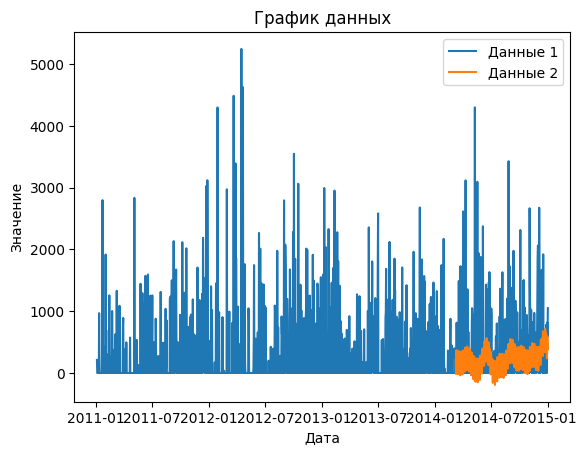

In [26]:

# Создание графика
plt.plot(dates['ds'], dates['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(299), forecast['yhat'].tail(299), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()

По скидкам

In [28]:
data_disc_acc = data_acc[['Order Date', 'Discount']].copy(deep=True)

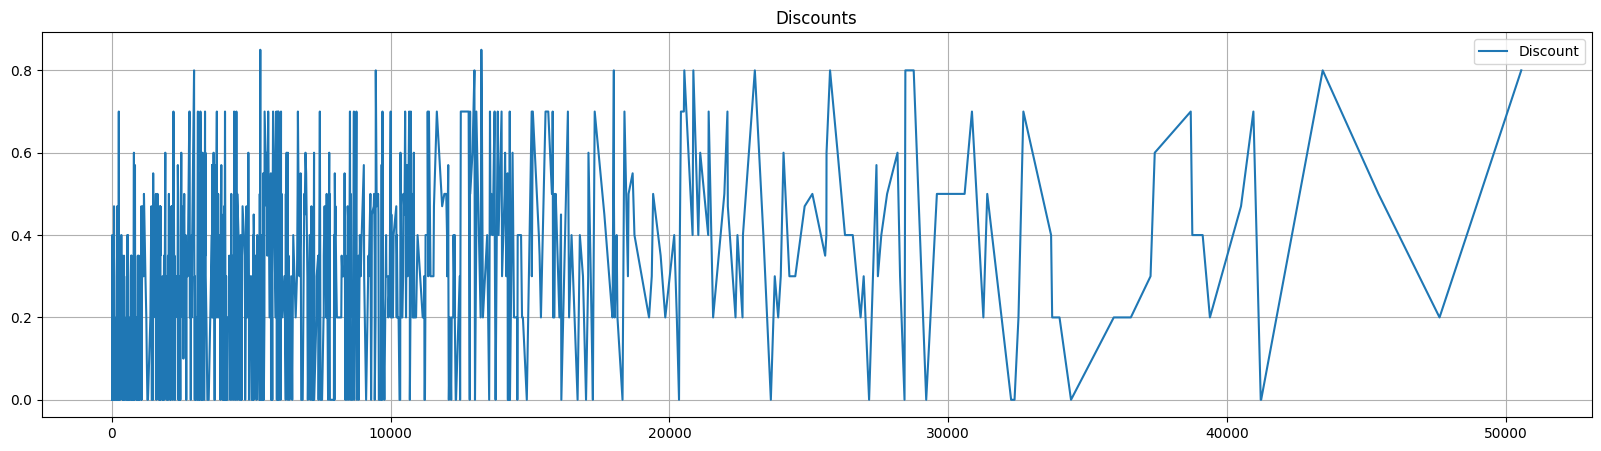

In [32]:
data_disc_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Discounts')
plt.show(block=False)

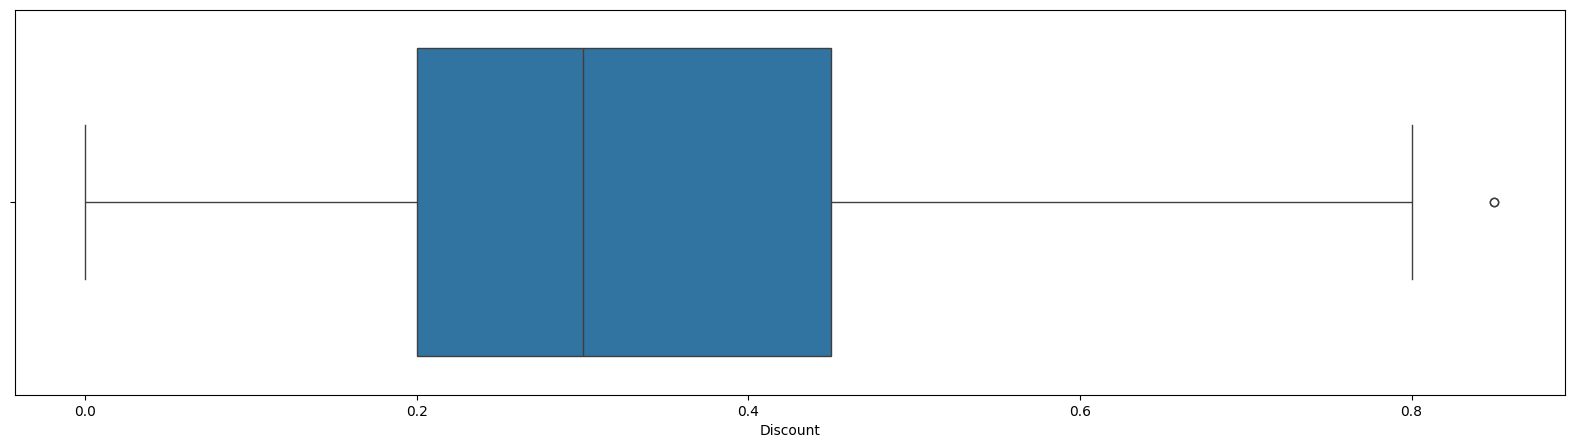

In [33]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_disc_acc['Discount'],whis=1.5)

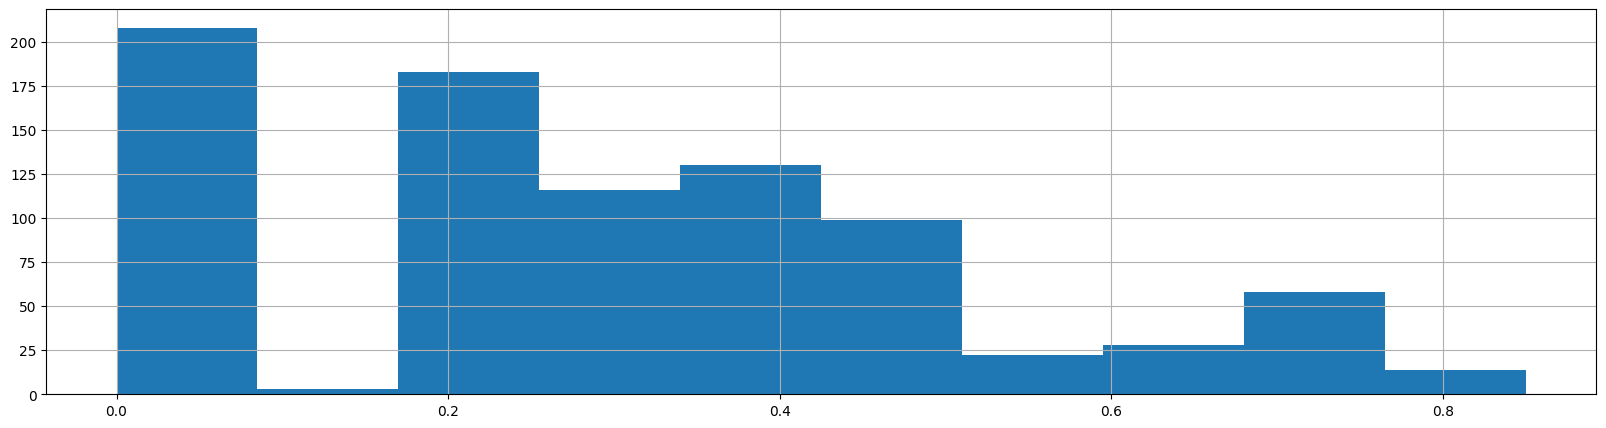

In [34]:
fig = data_disc_acc.Discount.hist(figsize = (20,5))

In [35]:
add_data_di = data_disc_acc.groupby(['Order Date'])
add_data_di = add_data_di.mean().round(2).reset_index()

In [16]:
add_data_di['Order Date'].max()

'2014-12-31'

In [17]:
add_data_di['Order Date'].min()

'2011-01-03'

In [40]:
ddates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
ddates = pd.DataFrame(ddates)
ddates = ddates.rename(columns = {0:'Order Date'})
add_data_di["Order Date"]=pd.to_datetime(add_data_di["Order Date"])
ddates= pd.merge(ddates, add_data_di, on = 'Order Date', how="left")
ddates = ddates.fillna(0)
ddates.set_index('Order Date', inplace=True)
ddatesm = ddates.resample('M').mean()

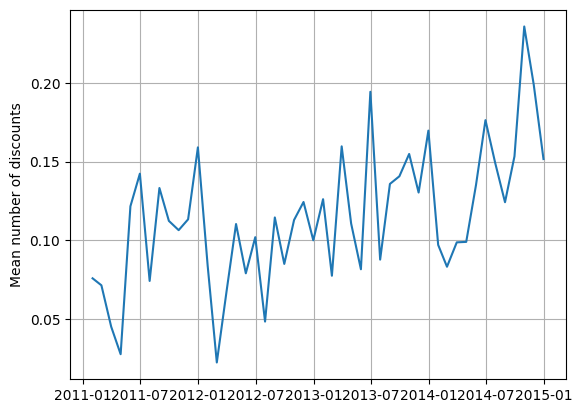

In [43]:
import matplotlib.pylab as plt
plt.plot(ddatesm)
plt.ylabel('Mean number of discounts')
plt.grid()
plt.show()

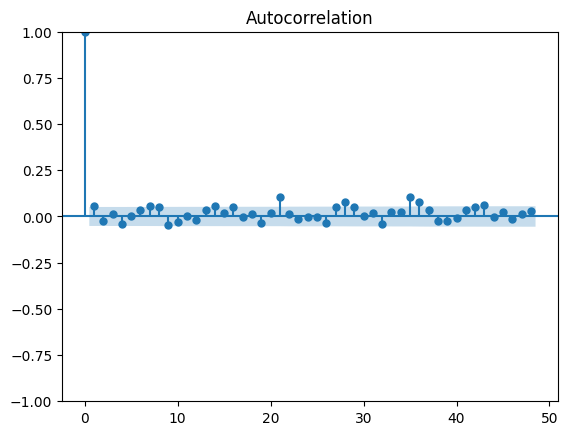

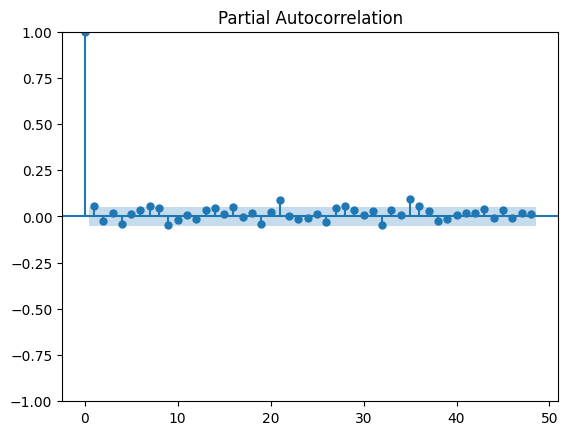

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ddates, lags =48)
plot_pacf(ddates, lags =48)
plt.show()

SARIMA

In [45]:
from pmdarima.arima import auto_arima
model = auto_arima(ddatesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-164.288, Time=1.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-147.998, Time=0.20 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-155.089, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-149.946, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-165.877, Time=0.84 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-166.429, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-166.214, Time=0.67 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-160.869, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-164.895, Time=0.17 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 5.546 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:

In [47]:
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]

-93.7
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3331      0.228     -1.463      0.143      -0.779       0.113
ma.L1         -0.6402      0.253     -2.526      0.012      -1.137      -0.143
ar.S.L3       -0.0577      0.247     -0.234      0.815      -0.542       0.426
ma.S.L3       -1.0001    548.771     -0.002      0.999   -1076.572    1074.572
sigma2         0.0011      0.614      0.002      0.999      -1.202       1.204


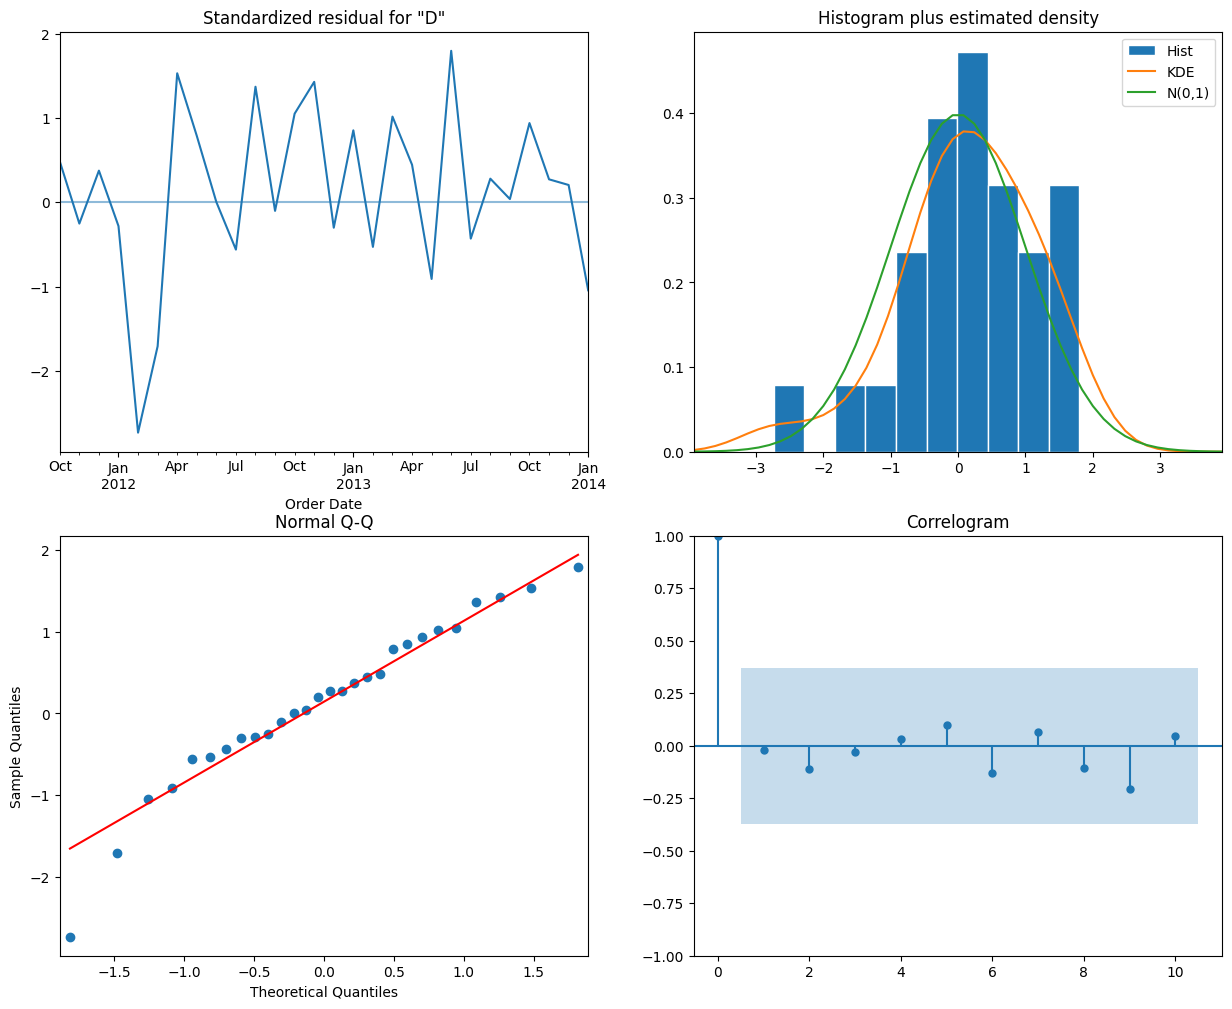

In [49]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

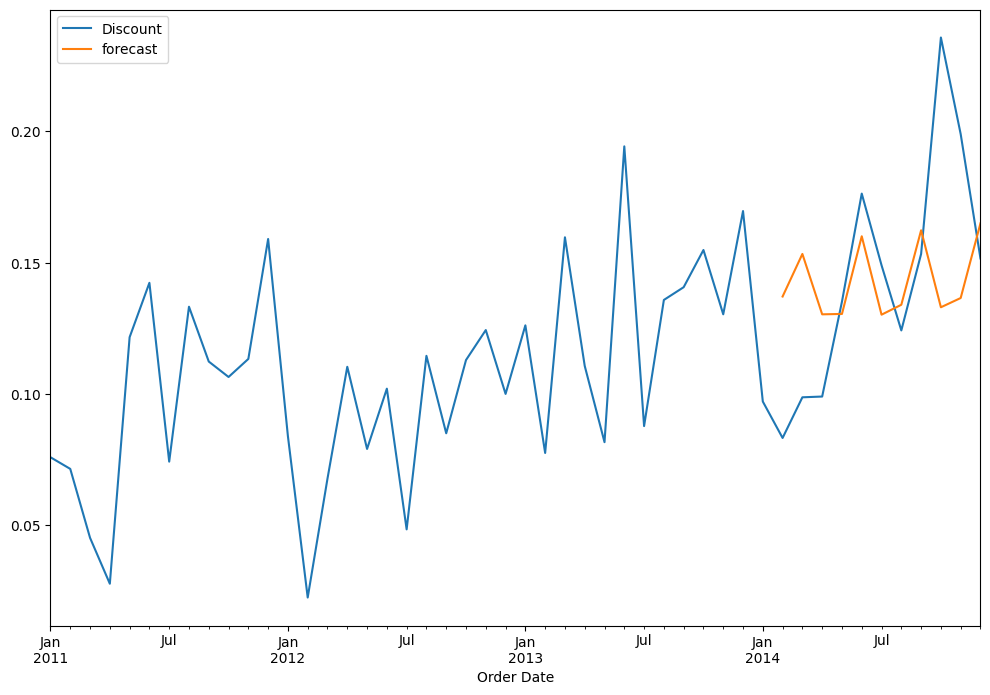

In [51]:
ddatesm['forecast']=results.predict(start=37,end=47,dynamic=True)
ddatesm[['Discount','forecast']].plot(figsize=(12,8))

In [57]:
measure_rmse(ddatesm.Discount[37:], ddatesm.forecast[37:])

0.045060726105100396

In [58]:
mean_absolute_percentage_error(ddatesm.Discount[37:], ddatesm.forecast[37:])

24.969093467964267

Prophet

In [59]:
ddatesm.drop('forecast', axis = 1, inplace = True)

In [62]:
ddatesm = ddatesm.reset_index()

In [63]:
ddatesm.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e3yr492/3kzke_mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0e3yr492/a6ks2nbl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59772', 'data', 'file=/tmp/tmp0e3yr492/3kzke_mz.json', 'init=/tmp/tmp0e3yr492/a6ks2nbl.json', 'output', 'file=/tmp/tmp0e3yr492/prophet_modelunfl2tia/prophet_model-20240420190422.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
19:04:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:04:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
37 2014-02-28  0.097808    0.073702    0.122501
38 2014-03-31  0.113055    0.089796    0.137323
39 2014-04-30  0.093408    0.070362    0.118554
40 2014-05-31  0.132573    0.109031    0.157342
41 2014-06-30  0.178513    0.155655    0.203207
42 2014-07-31  0.099970    0.078094    0.122263
43 2014-08-31  0.155665    0.132720    0.179236
44 2014-09-30  0.140695    0.117296    0.164648
45 2014-10-31  0.146098    0.120915    0.169570
46 2014-11-30  0.145987    0.121488    0.171842
47 2014-12-31  0.182136    0.158693    0.206688


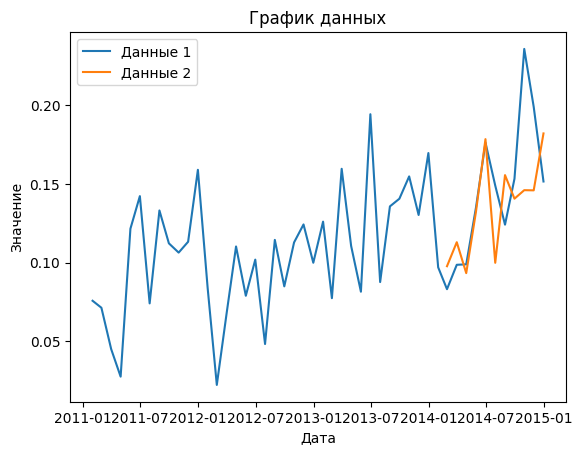

In [65]:

# Создание графика
plt.plot(ddatesm['ds'], ddatesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(11), forecast['yhat'].tail(11), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()

In [67]:
mean_absolute_percentage_error(ddatesm.y[37:], forecast.yhat[37:])

17.471796801616016

In [69]:
measure_rmse(ddatesm.y[37:], forecast.yhat[37:])

0.03790950628034224

LSTM

In [70]:
ddatesm.rename(columns={'ds': 'Order Date', 'y': 'Discount'}, inplace=True)
ddatesm.set_index('Order Date', inplace=True)

In [96]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ddates.values.reshape(-1, 1))

In [83]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)



In [98]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
seq_length = 30  # Длина последовательности (количество временных шагов)
train_x, train_y = create_sequences(train_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)

In [99]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [100]:
model.fit(train_x, train_y, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
72/72 [==============================] - 6s 22ms/step - loss: 0.0496
Epoch 2/30
72/72 [==============================] - 2s 28ms/step - loss: 0.0485
Epoch 3/30
72/72 [==============================] - 4s 48ms/step - loss: 0.0481
Epoch 4/30
72/72 [==============================] - 3s 40ms/step - loss: 0.0482
Epoch 5/30
72/72 [==============================] - 3s 43ms/step - loss: 0.0484
Epoch 6/30
72/72 [==============================] - 3s 38ms/step - loss: 0.0484
Epoch 7/30
72/72 [==============================] - 2s 31ms/step - loss: 0.0484
Epoch 8/30
72/72 [==============================] - 2s 27ms/step - loss: 0.0482
Epoch 9/30
72/72 [==============================] - 2s 21ms/step - loss: 0.0481
Epoch 10/30
72/72 [==============================] - 2s 22ms/step - loss: 0.0482
Epoch 11/30
72/72 [==============================] - 2s 22ms/step - loss: 0.0487
Epoch 12/30
72/72 [==============================] - 2s 21ms/step - loss: 0.0486
Epoch 13/30
72/72 [==================

9/9 [==============================] - 1s 10ms/step
Mean Squared Error: 0.04057026029612719


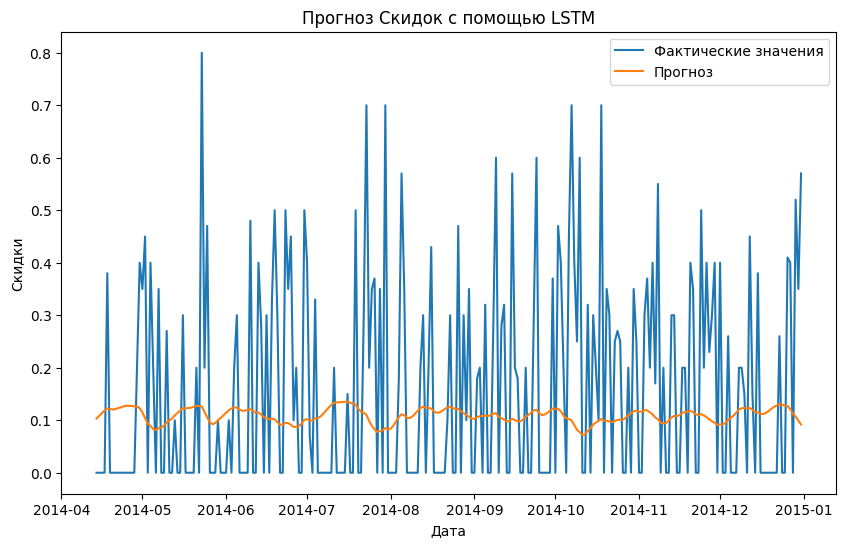

In [101]:
# Прогнозирование на тестовом наборе данных
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # Инвертирование масштабированных прогнозов
actual_values = scaler.inverse_transform(test_y.reshape(-1, 1))  # Инвертирование масштабированных фактических значений

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((predictions - actual_values) ** 2)
print('Mean Squared Error:', mse)

# Построение графика с прогнозами и фактическими значениями
plt.figure(figsize=(10, 6))
plt.plot(ddates.index[len(train_data) + seq_length:], actual_values, label='Фактические значения')
plt.plot(ddates.index[len(train_data) + seq_length:], predictions, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью LSTM')
plt.legend()
plt.show()

XGBoost

In [103]:
ddatesm['Год'] = ddatesm.index.year
ddatesm['Месяц'] = ddatesm.index.month
ddatesm['День'] = ddatesm.index.day
ddatesm['День_недели'] = ddatesm.index.weekday

In [104]:
sales_data = ddatesm['Discount']

In [105]:
train_data = ddatesm.loc[ddatesm.index < '2014-02-01']
test_data = ddatesm.loc[ddatesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [106]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

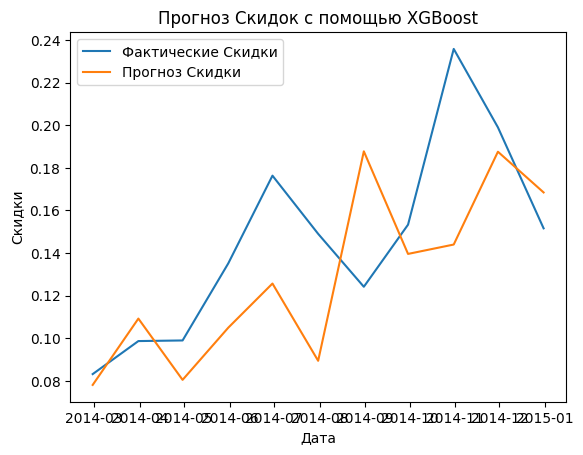

In [108]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [109]:
mean_absolute_percentage_error(test_target, predictions)

22.0356237496282

In [110]:
measure_rmse(test_target, predictions)

0.04324333373834599

XGBoost без аггрегации по месяцам

In [111]:
ddates['Год'] = ddates.index.year
ddates['Месяц'] = ddates.index.month
ddates['День'] = ddates.index.day
ddates['День_недели'] = ddates.index.weekday

In [112]:
sales_data = ddates['Discount']

In [113]:
train_data = ddates.loc[ddates.index < '2014-02-01']
test_data = ddates.loc[ddates.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [114]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

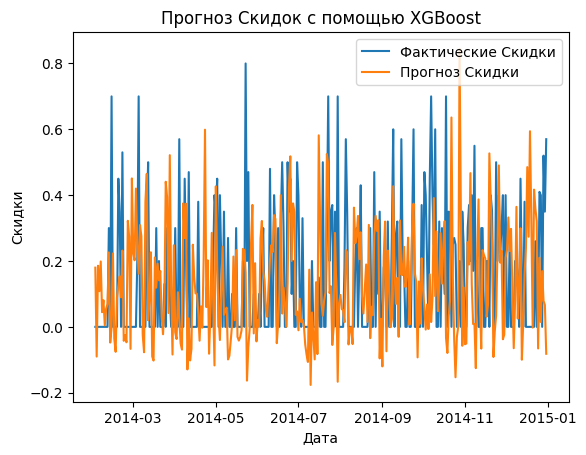

In [115]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [116]:
predictions[predictions < 0] = 0

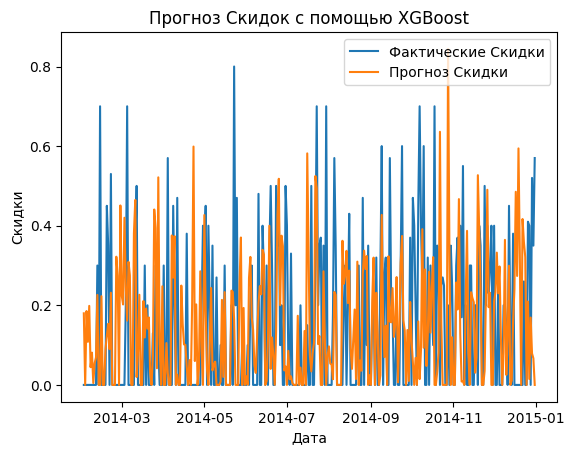

In [117]:
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [119]:
measure_rmse(test_target, predictions)

0.2342967855245524

In [11]:
data_disc_acc = data_acc[['Order Date', 'Discount']].copy(deep=True)

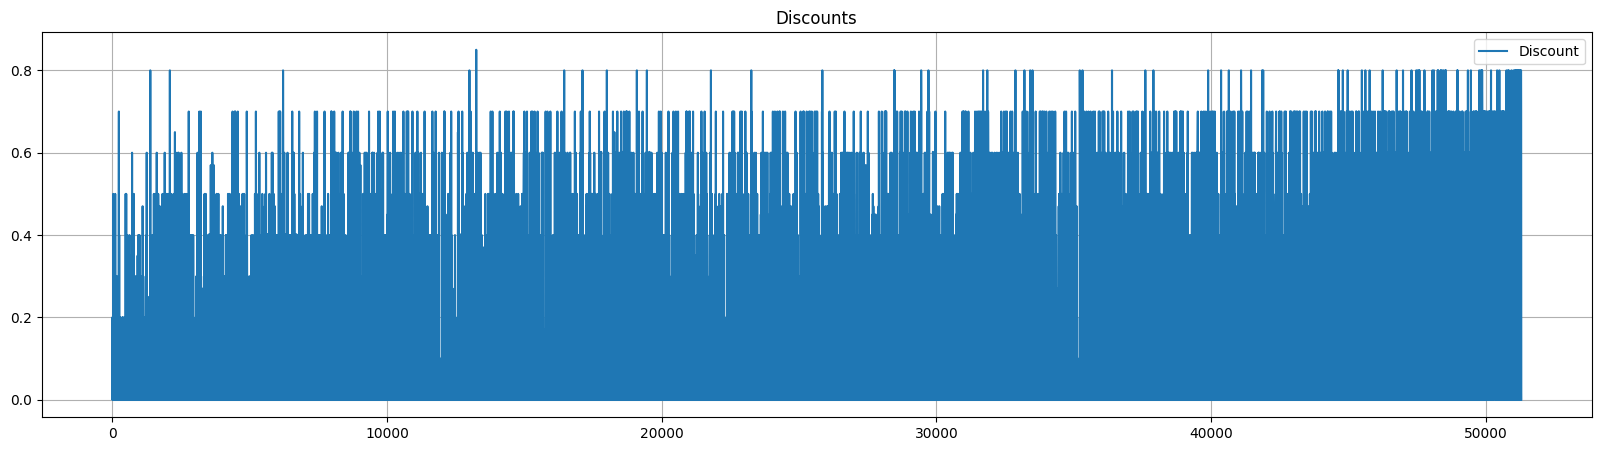

In [12]:
data_disc_acc.plot(figsize=(20, 5))
plt.grid()
plt.legend(loc='best')
plt.title('Discounts')
plt.show(block=False)

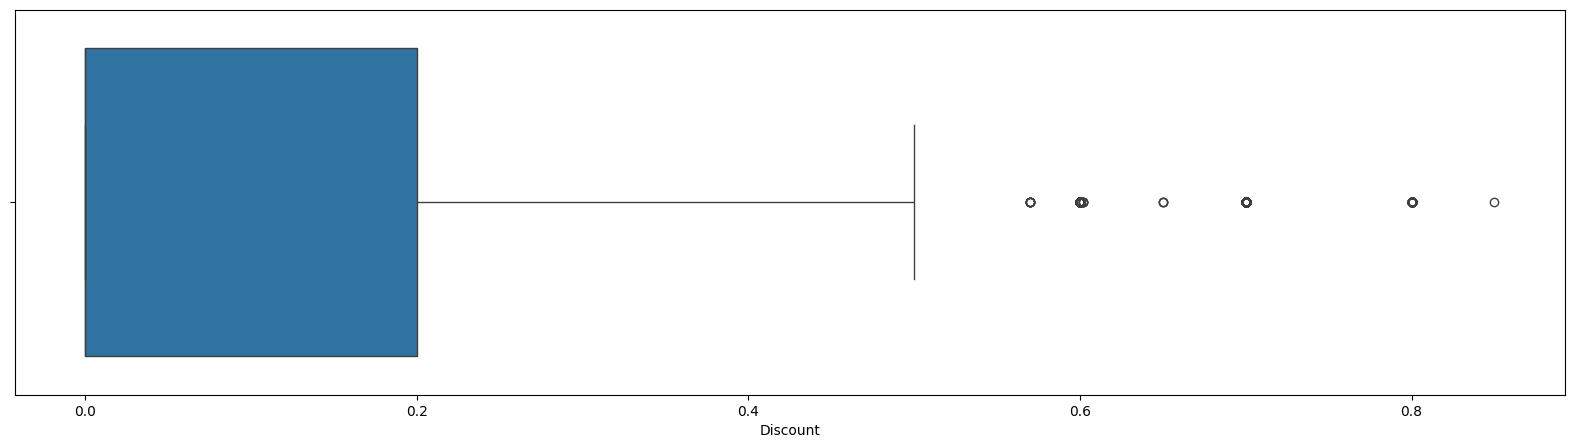

In [13]:
import seaborn as sns
fig = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(x=data_disc_acc['Discount'],whis=1.5)

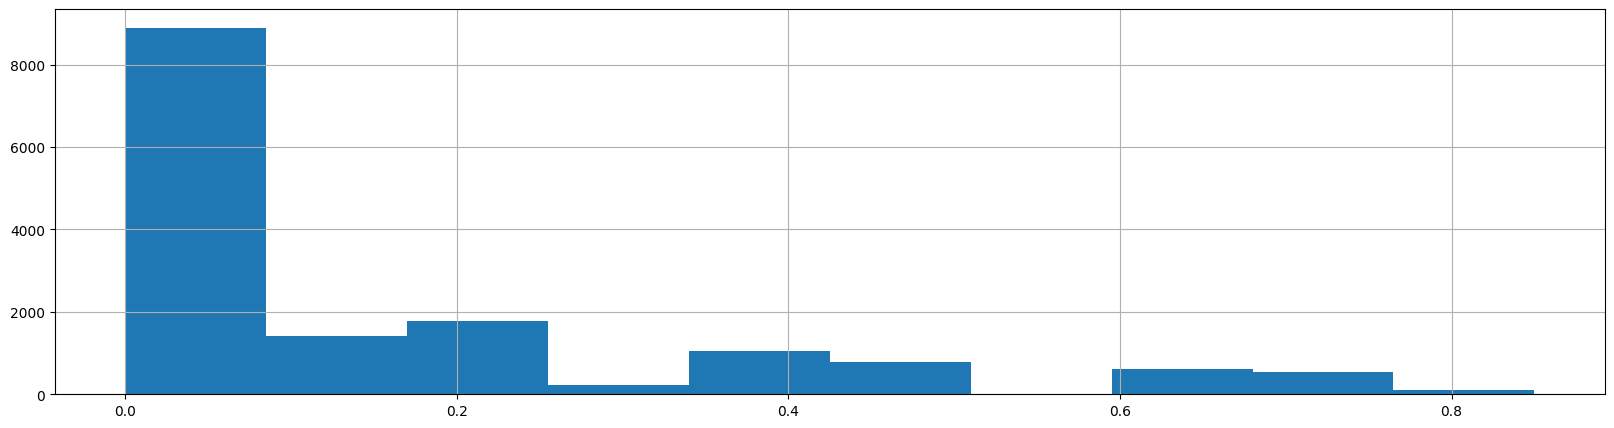

In [14]:
fig = data_disc_acc.Discount.hist(figsize = (20,5))

In [15]:
add_data_di = data_disc_acc.groupby(['Order Date'])
add_data_di = add_data_di.mean().round(2).reset_index()

In [18]:
ddates = pd.date_range(start='2011-01-03', end='2014-12-31', freq='D')
ddates = pd.DataFrame(ddates)
ddates = ddates.rename(columns = {0:'Order Date'})
add_data_di["Order Date"]=pd.to_datetime(add_data_di["Order Date"])
ddates= pd.merge(ddates, add_data_di, on = 'Order Date', how="left")
ddates = ddates.fillna(0)
ddates.set_index('Order Date', inplace=True)
ddatesm = ddates.resample('M').mean()

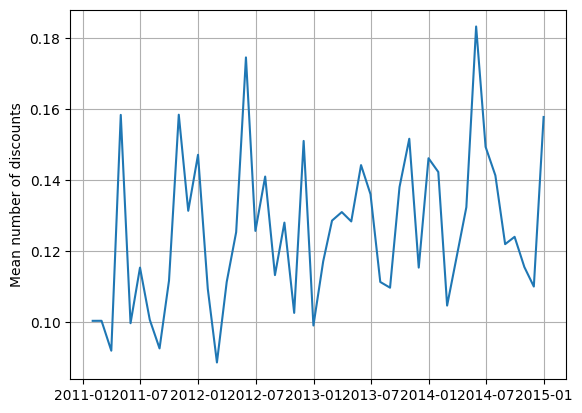

In [19]:
import matplotlib.pylab as plt
plt.plot(ddatesm)
plt.ylabel('Mean number of discounts')
plt.grid()
plt.show()

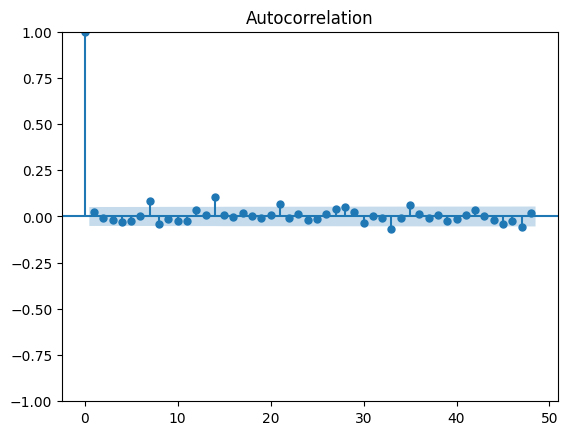

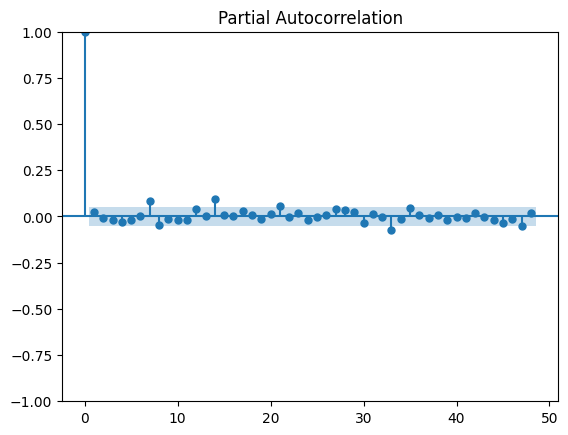

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ddates, lags =48)
plot_pacf(ddates, lags =48)
plt.show()

In [23]:
from pmdarima.arima import auto_arima
model = auto_arima(ddatesm, seasonal=True, trace=True) # Здесь sales_data - ваш временной ряд
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-195.790, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-203.898, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-197.706, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-202.489, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-216.539, Time=0.29 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-221.027, Time=0.32 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-205.268, Time=0.10 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-220.063, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-206.635, Time=0.24 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=-219.002, Time=0

In [25]:
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]

-152.13
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0741      0.185     -0.400      0.689      -0.437       0.289
ar.L2         -0.0434      0.173     -0.251      0.802      -0.382       0.295
ar.L3         -0.3555      0.251     -1.414      0.157      -0.848       0.137
ma.L1         -0.8743      0.182     -4.803      0.000      -1.231      -0.518
sigma2         0.0004      0.000      2.921      0.003       0.000       0.001


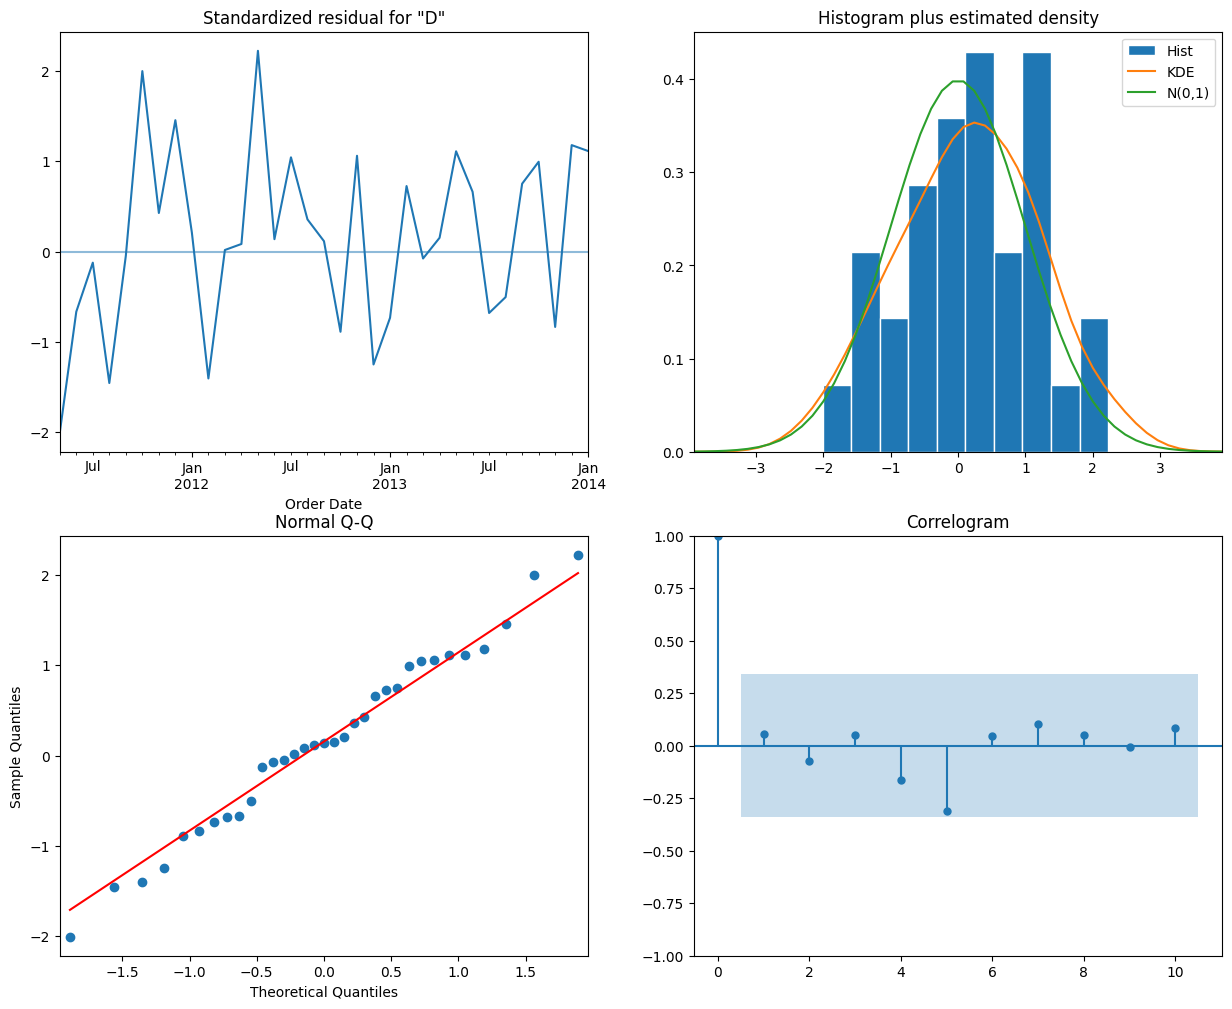

In [43]:
mod = sm.tsa.statespace.SARIMAX(train,
                                order=(3, 1, 1),
                                seasonal_order=(0, 0, 0, 3),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()

print(round(results.aic,2))
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

<Axes: xlabel='Order Date'>

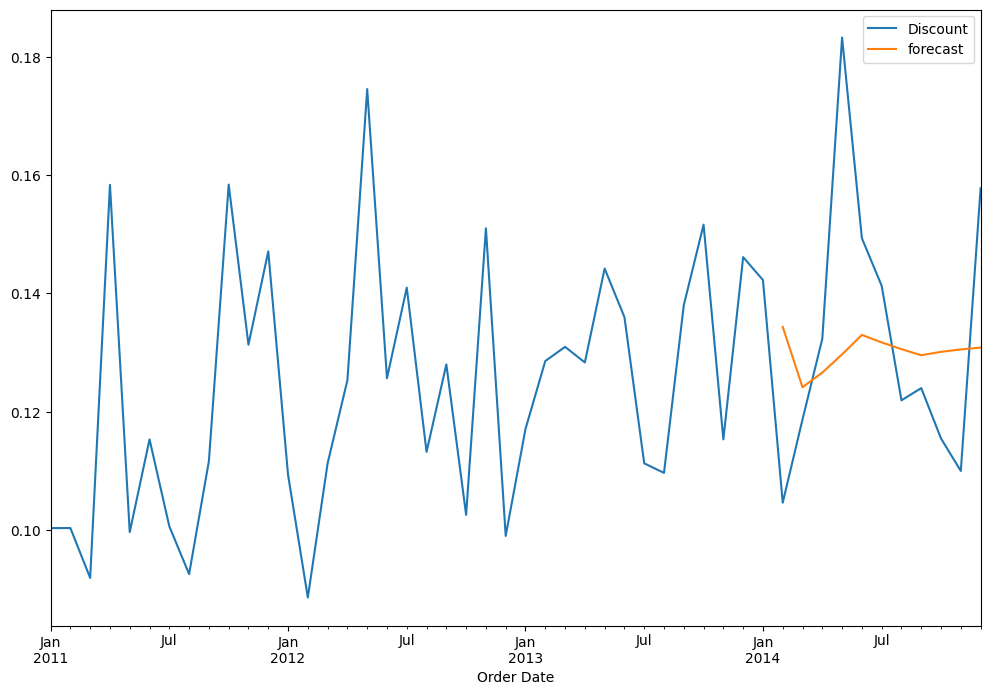

In [44]:
ddatesm['forecast']=results.predict(start=37,end=47,dynamic=True)
ddatesm[['Discount','forecast']].plot(figsize=(12,8))

In [49]:
mean_absolute_percentage_error(ddatesm.Discount[37:], ddatesm.forecast[37:])

13.106986408933793

In [48]:
measure_rmse(ddatesm.Discount[37:], ddatesm.forecast[37:])

0.022630329174445574

Prophet

In [50]:
ddatesm.drop('forecast', axis = 1, inplace = True)

In [51]:
ddatesm = ddatesm.reset_index()

In [54]:
ddatesm.rename(columns={'Order Date': 'ds', 'Discount': 'y'}, inplace=True)  # Переименование столбцов для Prophet
train_len = 37
train = ddatesm[0:train_len]
test = ddatesm[train_len:]
# Создание и обучение модели
model3 = Prophet()
model3.fit(train)

# Создание будущего фрейма данных для прогноза
future = model3.make_future_dataframe(periods=11, freq='M')  # Здесь 12 - количество шагов вперед, freq='M' - месячная частота

# Генерация прогноза
forecast = model3.predict(future)

# Вывод результатов прогноза
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(11))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_bg06q0/_jzpiyu1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl_bg06q0/1b2za6q9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75463', 'data', 'file=/tmp/tmpl_bg06q0/_jzpiyu1.json', 'init=/tmp/tmpl_bg06q0/1b2za6q9.json', 'output', 'file=/tmp/tmpl_bg06q0/prophet_modelt11pvc88/prophet_model-20240421174700.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:47:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


           ds      yhat  yhat_lower  yhat_upper
37 2014-02-28  0.120156    0.105741    0.135747
38 2014-03-31  0.122378    0.107763    0.137732
39 2014-04-30  0.164391    0.150681    0.180270
40 2014-05-31  0.144128    0.129289    0.159546
41 2014-06-30  0.143740    0.129125    0.158607
42 2014-07-31  0.129347    0.114316    0.144404
43 2014-08-31  0.118351    0.104141    0.133842
44 2014-09-30  0.136799    0.120723    0.151557
45 2014-10-31  0.161322    0.146530    0.175027
46 2014-11-30  0.140851    0.126028    0.156053
47 2014-12-31  0.150900    0.136369    0.165709


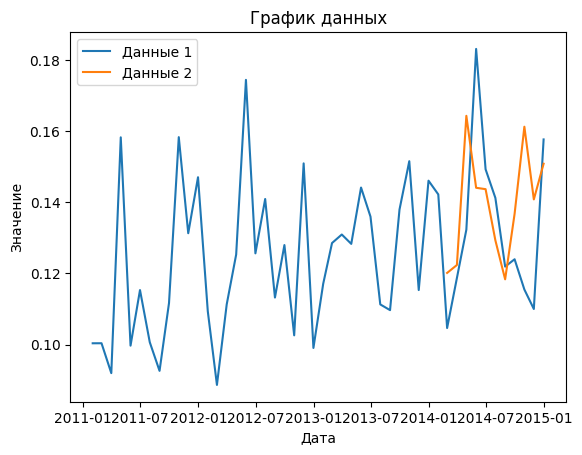

In [55]:

# Создание графика
plt.plot(ddatesm['ds'], ddatesm['y'], label='Данные 1')
plt.plot(forecast['ds'].tail(11), forecast['yhat'].tail(11), label='Данные 2')

# Настройка графика
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.title('График данных')
plt.legend()

# Отображение графика
plt.show()

In [56]:
mean_absolute_percentage_error(ddatesm.y[37:], forecast.yhat[37:])

14.637699146521111

In [57]:
measure_rmse(ddatesm.y[37:], forecast.yhat[37:])

0.02385700917860164

LSTM

In [62]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ddates.values.reshape(-1, 1))

In [63]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

In [64]:
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(x), np.array(y)



In [65]:
train_size = int(len(scaled_data) * 0.8)  # 80% данных для обучения, 20% для тестирования
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
seq_length = 30  # Длина последовательности (количество временных шагов)
train_x, train_y = create_sequences(train_data, seq_length)
test_x, test_y = create_sequences(test_data, seq_length)

In [66]:
model = Sequential()
model.add(LSTM(units=20, return_sequences=True, input_shape=(train_x.shape[1], 1)))
model.add(LSTM(units=20))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [67]:
model.fit(train_x, train_y, epochs=30, batch_size=16, verbose=1)

Epoch 1/30
72/72 [==============================] - 6s 24ms/step - loss: 0.0321
Epoch 2/30
72/72 [==============================] - 3s 35ms/step - loss: 0.0279
Epoch 3/30
72/72 [==============================] - 2s 22ms/step - loss: 0.0277
Epoch 4/30
72/72 [==============================] - 2s 22ms/step - loss: 0.0278
Epoch 5/30
72/72 [==============================] - 2s 25ms/step - loss: 0.0279
Epoch 6/30
72/72 [==============================] - 2s 23ms/step - loss: 0.0280
Epoch 7/30
72/72 [==============================] - 2s 27ms/step - loss: 0.0277
Epoch 8/30
72/72 [==============================] - 2s 30ms/step - loss: 0.0278
Epoch 9/30
72/72 [==============================] - 2s 33ms/step - loss: 0.0277
Epoch 10/30
72/72 [==============================] - 2s 24ms/step - loss: 0.0280
Epoch 11/30
72/72 [==============================] - 2s 24ms/step - loss: 0.0277
Epoch 12/30
72/72 [==============================] - 2s 23ms/step - loss: 0.0278
Epoch 13/30
72/72 [==================

9/9 [==============================] - 1s 8ms/step
Mean Squared Error: 0.010147766963744257


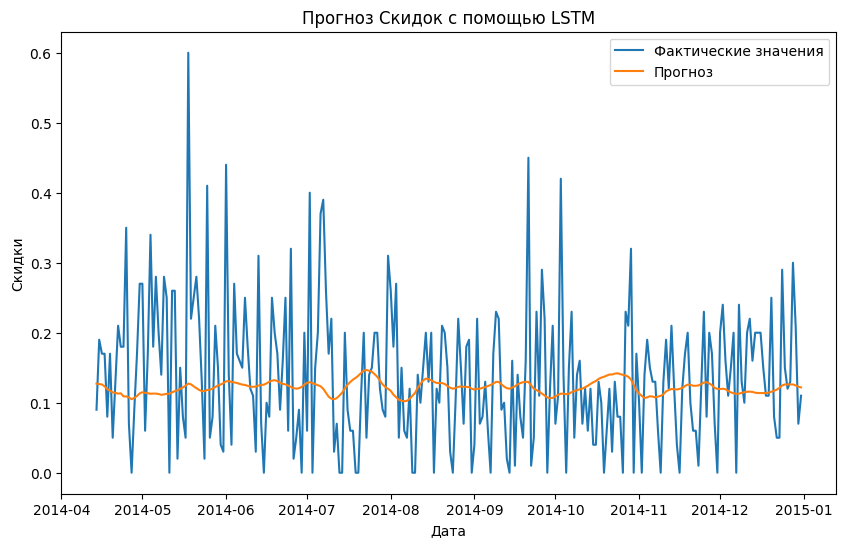

In [68]:
# Прогнозирование на тестовом наборе данных
predictions = model.predict(test_x)
predictions = scaler.inverse_transform(predictions)  # Инвертирование масштабированных прогнозов
actual_values = scaler.inverse_transform(test_y.reshape(-1, 1))  # Инвертирование масштабированных фактических значений

# Расчет среднеквадратичной ошибки (MSE)
mse = np.mean((predictions - actual_values) ** 2)
print('Mean Squared Error:', mse)

# Построение графика с прогнозами и фактическими значениями
plt.figure(figsize=(10, 6))
plt.plot(ddates.index[len(train_data) + seq_length:], actual_values, label='Фактические значения')
plt.plot(ddates.index[len(train_data) + seq_length:], predictions, label='Прогноз')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью LSTM')
plt.legend()
plt.show()

In [ ]:
measure_rmse(test_target, predictions)

XGBoost

In [71]:
ddatesm['Год'] = ddatesm.index.year
ddatesm['Месяц'] = ddatesm.index.month
ddatesm['День'] = ddatesm.index.day
ddatesm['День_недели'] = ddatesm.index.weekday

In [72]:
sales_data = ddatesm['Discount']

In [73]:
train_data = ddatesm.loc[ddatesm.index < '2014-02-01']
test_data = ddatesm.loc[ddatesm.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [76]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

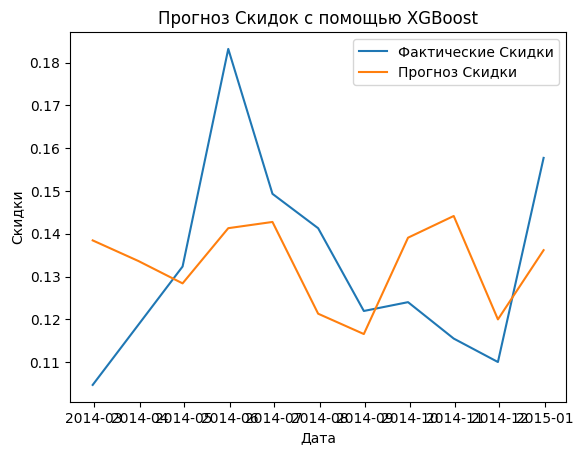

In [77]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [78]:
mean_absolute_percentage_error(test_target, predictions)

13.947994975700873

In [79]:
measure_rmse(test_target, predictions)

0.0217934472366668

In [80]:
ddates['Год'] = ddates.index.year
ddates['Месяц'] = ddates.index.month
ddates['День'] = ddates.index.day
ddates['День_недели'] = ddates.index.weekday

In [81]:
sales_data = ddates['Discount']

In [82]:
train_data = ddates.loc[ddates.index < '2014-02-01']
test_data = ddates.loc[ddates.index >= '2014-02-01']
train_target = sales_data.loc[sales_data.index < '2014-02-01']
test_target = sales_data.loc[sales_data.index >= '2014-02-01']

In [83]:
model = XGBRegressor()
model.fit(train_data.drop('Discount', axis=1), train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

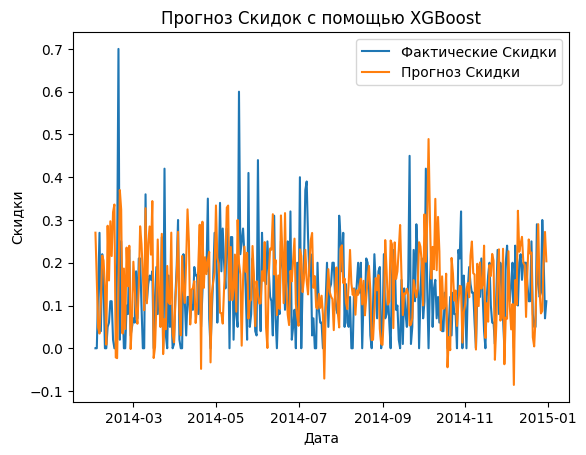

In [84]:
predictions = model.predict(test_data.drop('Discount', axis=1))

# Визуализация прогноза
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [85]:
predictions[predictions < 0] = 0

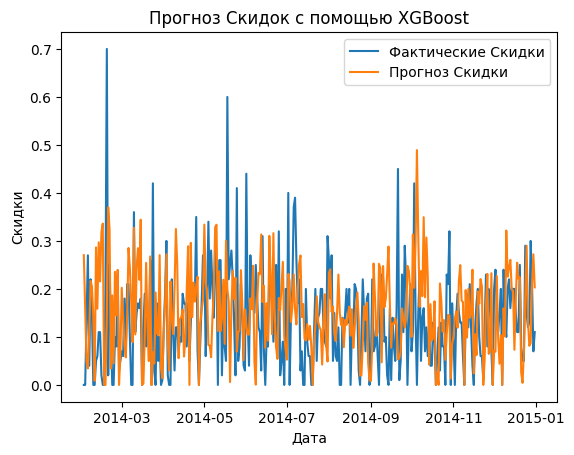

In [86]:
plt.plot(test_data.index, test_target, label='Фактические Скидки')
plt.plot(test_data.index, predictions, label='Прогноз Скидки')
plt.xlabel('Дата')
plt.ylabel('Скидки')
plt.title('Прогноз Скидок с помощью XGBoost')
plt.legend()
plt.show()


In [88]:
measure_rmse(test_target, predictions)

0.12839669495659048